Agenda

-- primary data analysis (gap distance, presence of categorical features, ...)

-- feature engineering (build 1-2 new features)

-- scaling feature

-- division of the dataset into training, validation and test parts

-- training the base model with default hyperparameters

-- selection of hyperparameters

-- evaluation of results

In [1]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
# import necessary libraries

import pandas as pd
import numpy as np

#import graph libraries
import seaborn as sns
import matplotlib.pyplot as plt

#import sklearn libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.compose import make_column_transformer

#import sklearn models

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import lasso_path
import statsmodels.formula.api as smf

from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PoissonRegressor

# OLS

from __future__ import print_function
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [3]:
#load data

red_wine_path = "/content/drive/MyDrive/Hillel_ML_Course/5/data/winequality-red.csv"
white_wine_path = "/content/drive/MyDrive/Hillel_ML_Course/5/data/winequality-white.csv"

red_wine_data = pd.read_csv(red_wine_path, sep=";")
white_wine_data = pd.read_csv(white_wine_path, sep=";")


In [4]:
# create score sotre to print out it and compare models in the end
score_store = {}

# Exploratory data analysis

## white wine data eda

in white wine table more rows , so i'll maden eda with it

In [5]:
#let's see first 2 rows of data to observe feature
red_wine_data.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [6]:
# and more info

red_wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


this data doesn`t has object type values

In [7]:
white_wine_data.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


In [8]:
white_wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


as we see the data in both tables are same. so we can merge it

In [9]:
# # merge tables

# data = white_wine_data.merge(red_wine_data, on=red_wine_data.columns.to_list())

# data

In [10]:
# data.info()

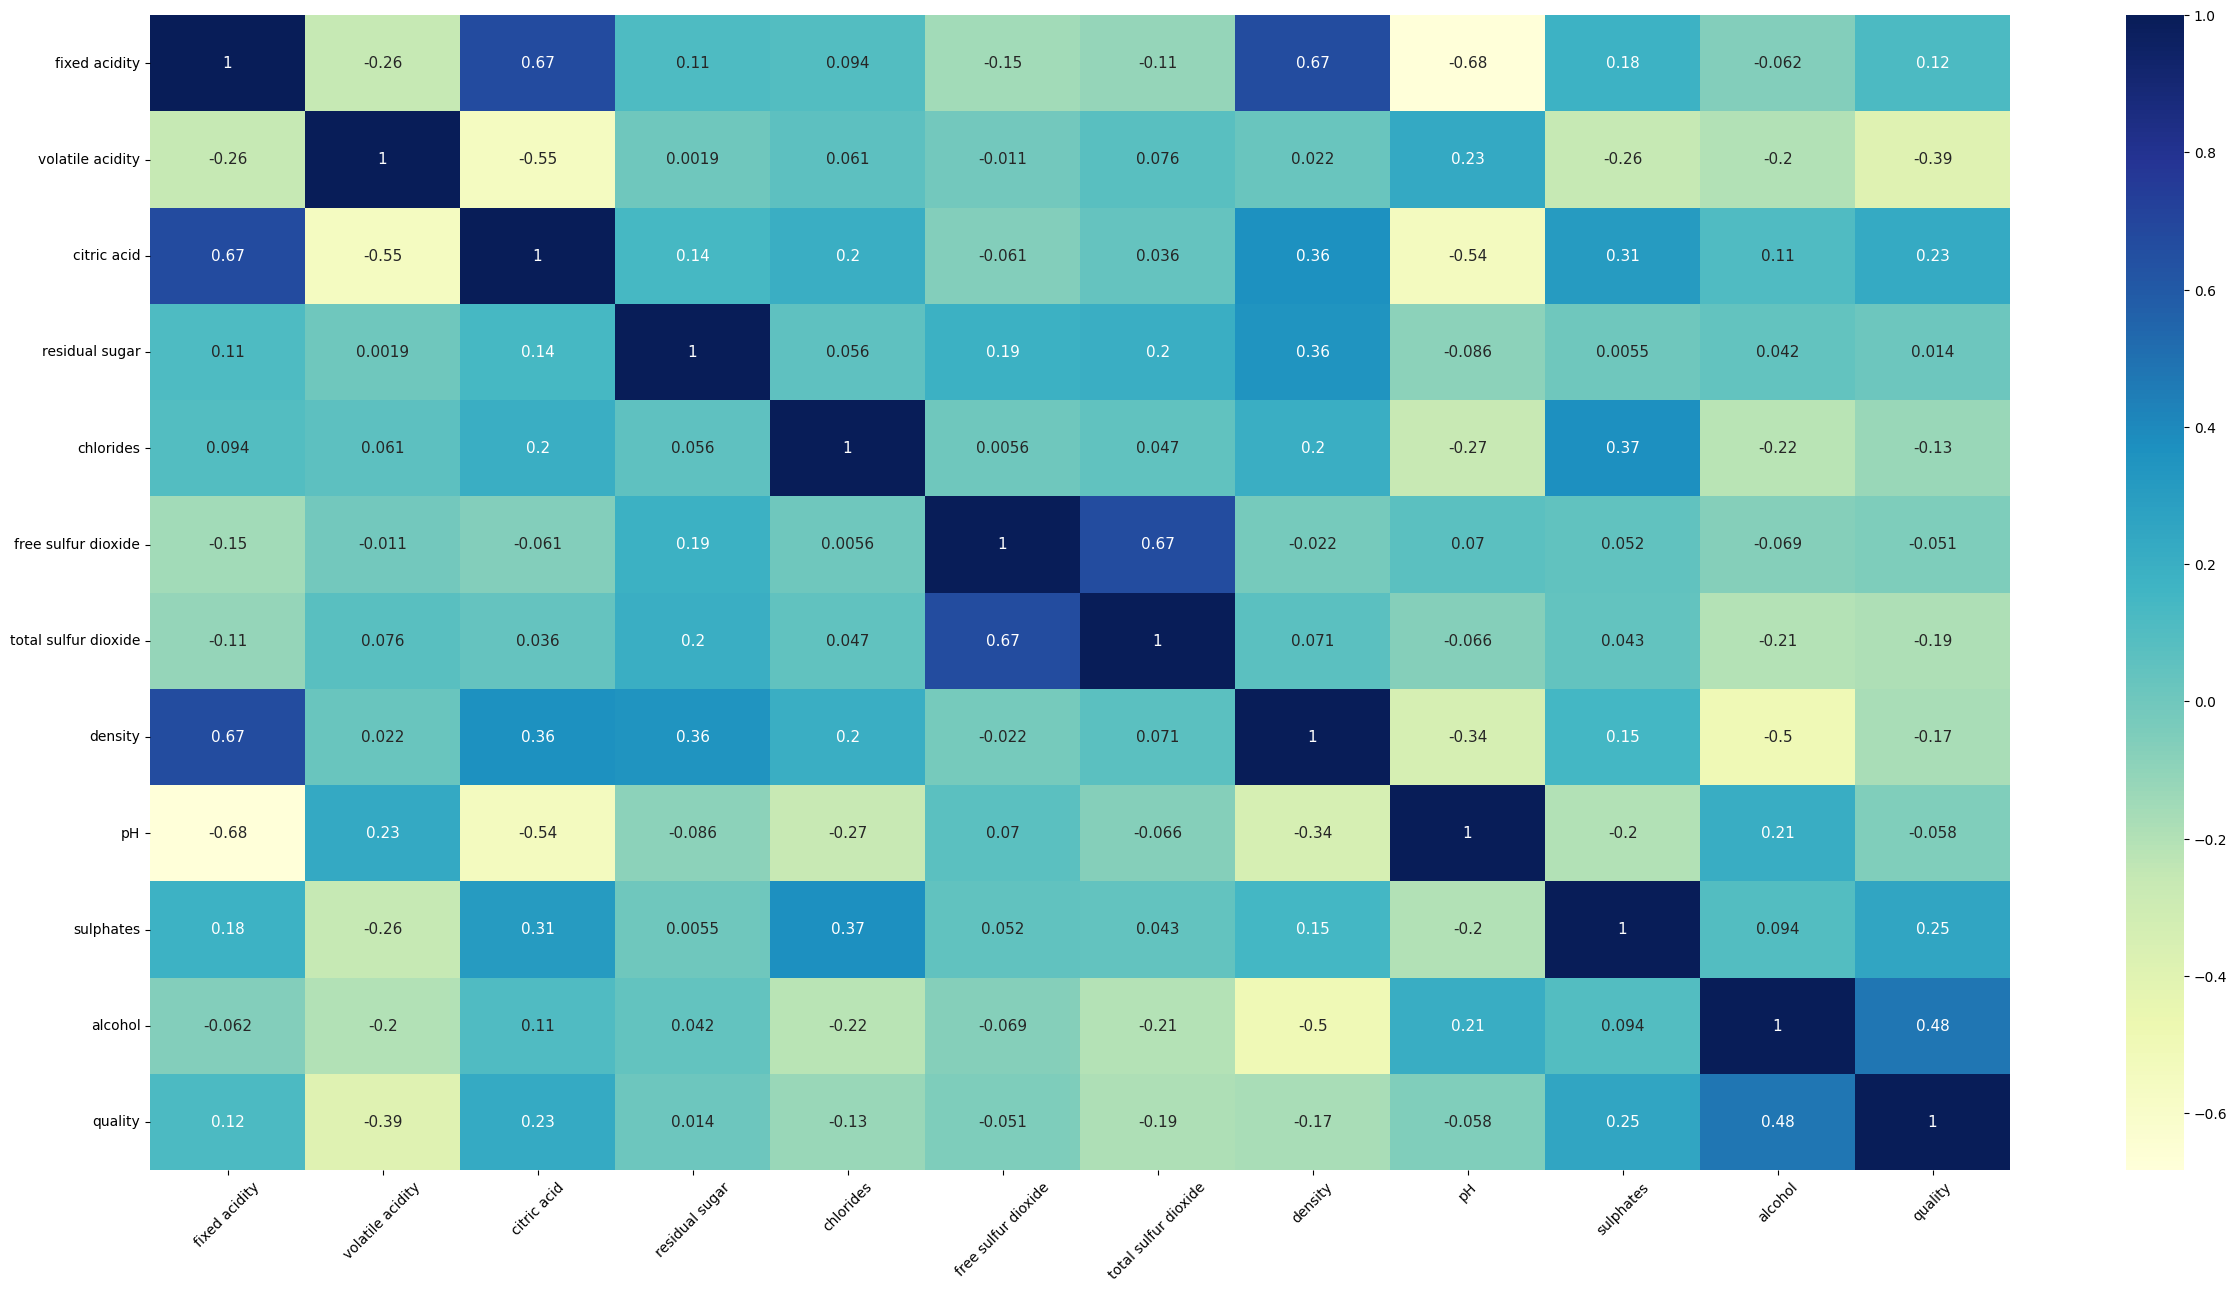

In [11]:
# let's inspect correlation between features:

white_wine_corr = red_wine_data.corr()

plt.figure(figsize=(30, 15))

# Create mask
mask = np.triu(white_wine_corr)

#Create heatmap:
sns.heatmap(white_wine_corr, cmap="YlGnBu", annot=True, annot_kws={"fontsize":11})

plt.xticks(rotation=45)
plt.show()

The most correlated features with quality are alcohol and sulphates with citric acid

In [12]:
# and more observation

white_wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


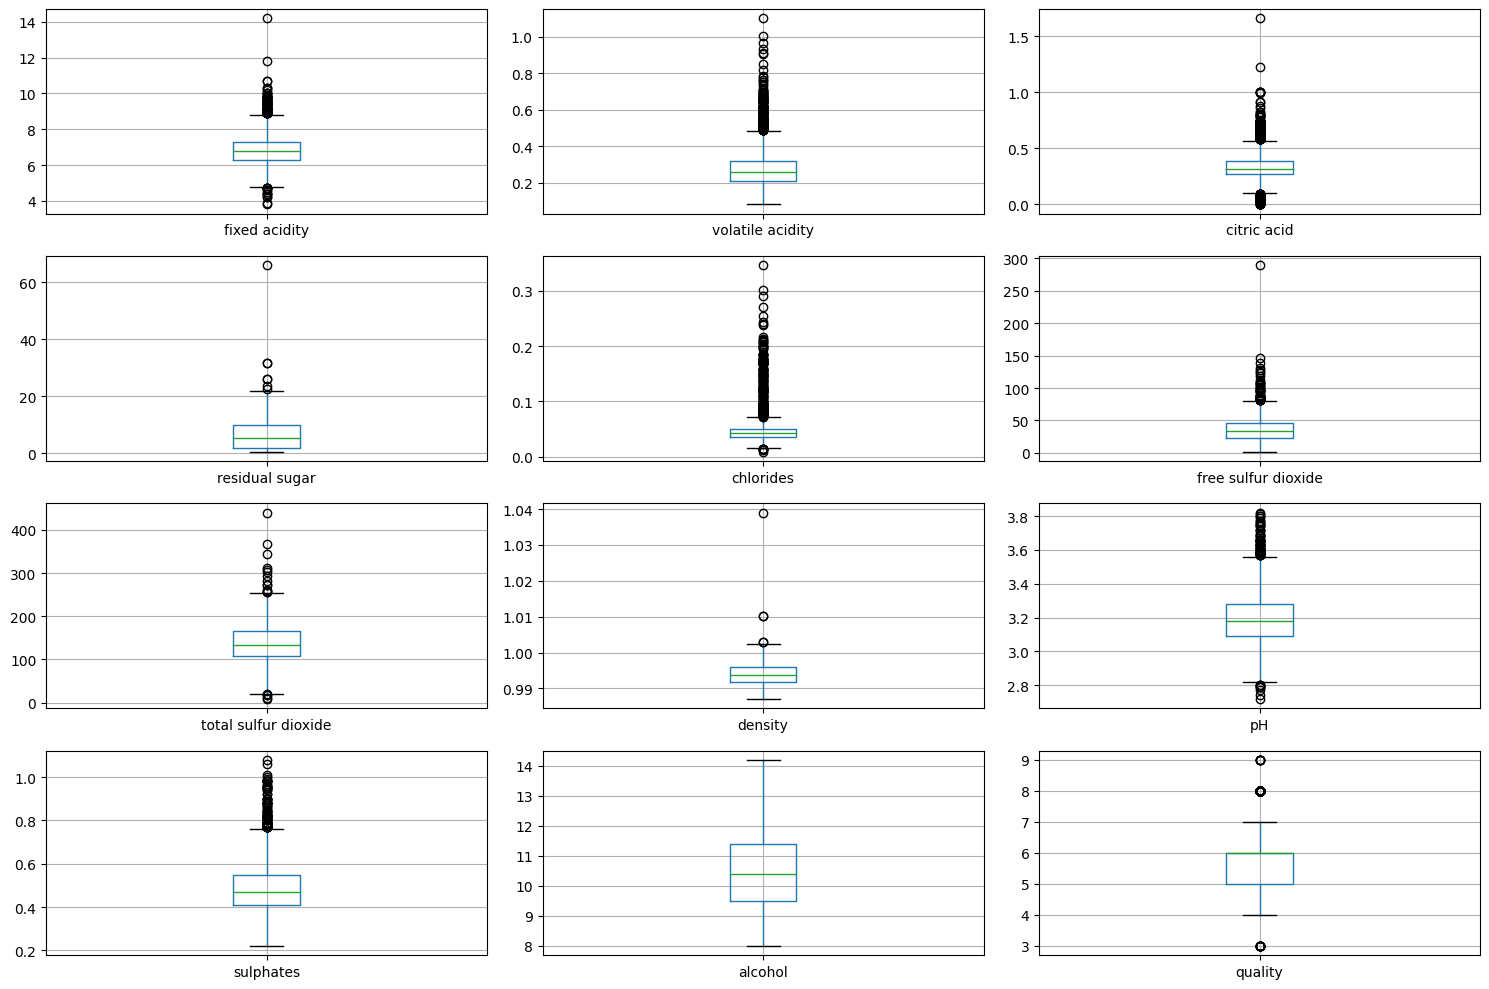

In [13]:
# let's plot all columns to see possible out

columns = white_wine_data.columns

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))

axes = axes.flatten()

for i, col in enumerate(columns):
    white_wine_data.boxplot(column=col, ax=axes[i])

for i in range(len(columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

by this time i decided to compare 2 data, first one - original data +feature engeneering and another data - without values thet greater then 85 % of data values. but by first i'll add 2 features to data

##white wine eda

In [14]:
white_wine_data.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


#**Feature engeniiring**

In [15]:
# i'll maden 2 columns to get ratio of sulfur and acid

white_wine_data["sulfur_ratio"] = white_wine_data["total sulfur dioxide"] / \
                                          white_wine_data["free sulfur dioxide"]

white_wine_data["acid_ratio"] = white_wine_data['volatile acidity'] / \
                                                white_wine_data['fixed acidity']

#and may be will interesting total acid

white_wine_data["total_acid"] = white_wine_data["fixed acidity"] + \
            white_wine_data["volatile acidity"] + white_wine_data["citric acid"]

In [16]:
white_wine_data.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,sulfur_ratio,acid_ratio,total_acid
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6,3.777778,0.038571,7.63
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6,9.428571,0.047619,6.94


Make features to red wine

In [17]:
# feature engennering for red wine

red_wine_data["sulfur_ratio"] = red_wine_data["total sulfur dioxide"] / \
                                          red_wine_data["free sulfur dioxide"]

red_wine_data["acid_ratio"] = red_wine_data['volatile acidity'] / \
                                                red_wine_data['fixed acidity']

#and may be will interesting total acid

red_wine_data["total_acid"] = red_wine_data["fixed acidity"] + \
            red_wine_data["volatile acidity"] + red_wine_data["citric acid"]

#**Preprocess data and creating pipeline**

In [18]:
white_wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
 12  sulfur_ratio          4898 non-null   float64
 13  acid_ratio            4898 non-null   float64
 14  total_acid            4898 non-null   float64
dtypes: float64(14), int64

In [19]:
#let's split into features and target where X - features, y - target

X = white_wine_data.drop(columns="quality", axis=0).copy()
y = white_wine_data["quality"]

In [20]:
X.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,sulfur_ratio,acid_ratio,total_acid
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,3.777778,0.038571,7.63
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,9.428571,0.047619,6.94


better evaluates data which not includded in training proccess, so i decide to make red_wine table to valid dataset

In [21]:
#let's split into features and target where X_valid - features, y_valid - target

X_valid = red_wine_data.drop(columns="quality", axis=0).copy()
y_valid = red_wine_data["quality"]


In [22]:
X_valid.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,sulfur_ratio,acid_ratio,total_acid
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,3.090909,0.094595,8.10
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2.680000,0.112821,8.68
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,3.600000,0.097436,8.60
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3.529412,0.025000,12.04
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,3.090909,0.094595,8.10


Split data into train-test set

In [23]:
# split data where train size will 80% and test 20% sets and shuffle them

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,
                                                                  shuffle=True)

In [24]:
# define standart sclaer
scaler = StandardScaler()

#linear regression

In [25]:
#Create pipeline for Linear regression model, where data will scale, and fit by model


lr_pipeline = make_pipeline(scaler, LinearRegression())


In [26]:
#fit data
lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [27]:
# Cross validation for train and test set

lr_cv_score = cross_val_score(lr_pipeline, X_train, y_train, cv=5)

lr_test_score = lr_pipeline.score(X_test, y_test)

print(f"cross validation score of linear regression is {lr_cv_score.mean()}")
print(f"test score  is {lr_test_score}")

#store result
score_store["Linear_Regression"]=lr_test_score

cross validation score of linear regression is 0.2845727337240833
test score  is 0.3247681553791928


##Score

In [28]:
#how it works on valid data

lr_valid_score = lr_pipeline.score(X_valid, y_valid)

print(f"test score  is {lr_valid_score}")

test score  is -0.32418613927255424


I make mistake when thought that red wine data set can be validate data for white wine because they are have different paramas and qualities

#Classification by Logistic regression

In [29]:
#create pipeline with logistic regression

log_reg_pipeline = make_pipeline(scaler, LogisticRegression(max_iter=400, random_state=42))

In [30]:
log_reg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(max_iter=400, random_state=42))])

##Score

In [31]:
log_reg_cv_score = cross_val_score(log_reg_pipeline, X_train, y_train, cv=5)

print(f"cross validation score of linear regression is {log_reg_cv_score.mean()}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


cross validation score of linear regression is 0.5428806005160685


In [32]:
#sotre score
score_store["Logistic_regression"] = log_reg_cv_score.mean()

# linear OLS regressor

In [33]:
#create new data variables as static models require

X_test_scaled = scaler.fit_transform(X_test)
X_train_scaled = scaler.fit_transform(X_train)

X_test_ols = sm.add_constant(X_test_scaled)
X_train_ols = sm.add_constant(X_train_scaled)


In [34]:
# Fitting model
ols_model = sm.OLS(y_train, X_train_ols).fit()
print(ols_model.summary(alpha = 0.05))

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     124.3
Date:                Sun, 22 Sep 2024   Prob (F-statistic):          1.19e-281
Time:                        15:15:48   Log-Likelihood:                -4409.0
No. Observations:                3918   AIC:                             8846.
Df Residuals:                    3904   BIC:                             8934.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8788      0.012    492.667      0.0

##Score

In [35]:
#evaluate model with mean absolute error

ols_y_pred = ols_model.predict(X_test_ols) # Running predictions
mean_absolute_eroor = mae(y_test, ols_y_pred) # Computing RMSE

print(f'\nMean absolute error for Baseline Model: {mean_absolute_eroor:.2f}')


Mean absolute error for Baseline Model: 0.58


In [36]:
#store result

score_store["OLS"] = mean_absolute_eroor

#Lasso coeficients

(1.1754207474639937e-05,
 0.6328872512871213,
 -0.44514948802982957,
 0.4540572521521431)

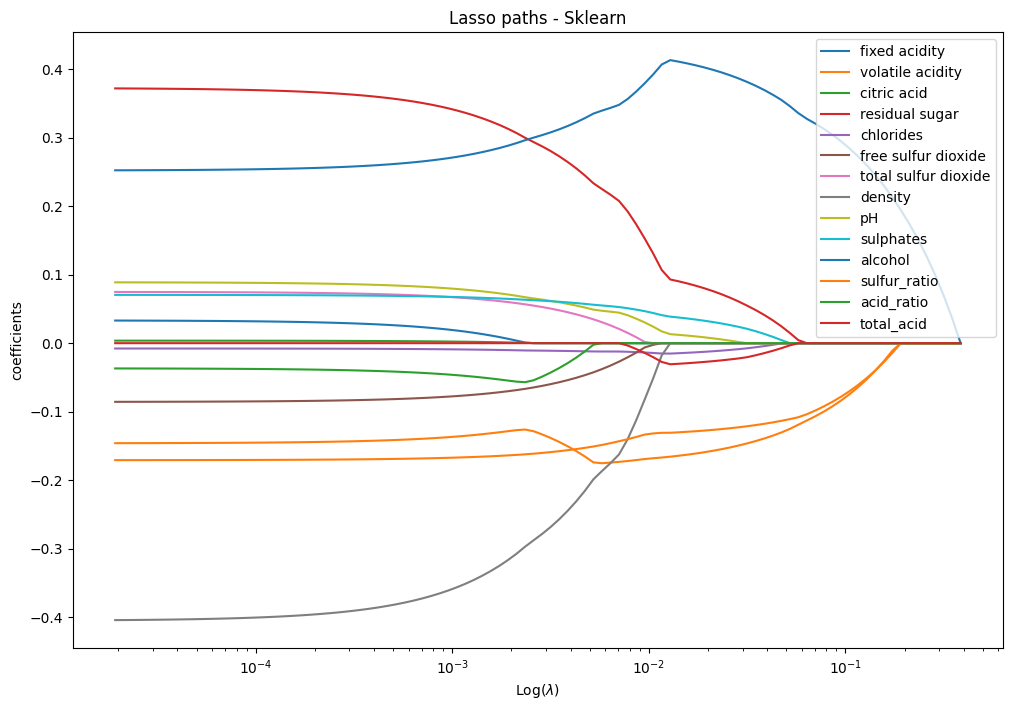

In [37]:
# Lasso

from sklearn import preprocessing

variables = X_train.columns.to_list()

data_subset = white_wine_data.loc[:, variables + ['quality']]
data_subset.dropna(inplace=True)

X = data_subset.loc[:,variables]
X = preprocessing.scale(X)
y = np.array(data_subset.quality)

alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps = 5e-5)

# Display results
plt.figure(figsize = (12,8))

for i in range(X.shape[1]):
    plt.plot(alphas_lasso, coefs_lasso[i], label = variables[i])

plt.xscale('log')
plt.xlabel('Log($\\lambda$)')
plt.ylabel('coefficients')
plt.title('Lasso paths - Sklearn')
plt.legend()
plt.axis('tight')


fixed acidity and residual sugar are most valuable features in data

#SGD regressor

In [38]:
# Define model

sgd_regressor = SGDRegressor(random_state=42)

#set parameters list to grid

sgd_regr_params = {"l1_ratio": np.arange(0.01, 0.05, 0.01),
                  "max_iter":np.arange(400,2000, 400)}

In [39]:
# make pipeline with grid_search with cv param. Refit=True to return best cv score

sgd_regr_pipeline = make_pipeline(scaler, GridSearchCV(sgd_regressor,
                                                       sgd_regr_params, cv=5,
                                                                    refit=True))

In [40]:
# grid_search_ params

#cv Determines the cross-validation splitting strategy.

sgd_regr_grid = GridSearchCV(sgd_regr_pipeline, sgd_regr_params, cv=5)

In [41]:
#fit grid searcg

sgd_regr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gridsearchcv',
                 GridSearchCV(cv=5, estimator=SGDRegressor(random_state=42),
                              param_grid={'l1_ratio': array([0.01, 0.02, 0.03, 0.04]),
                                          'max_iter': array([ 400,  800, 1200, 1600])}))])

In [42]:
sgd_reg_cv_score = cross_val_score(sgd_regr_pipeline, X_train, y_train, cv=5)

print(f"cross validation score of sgd regression is {sgd_reg_cv_score.mean()}")

cross validation score of sgd regression is 0.28386791120409


##Score

In [43]:
# get best score
best_score = sgd_regr_pipeline.named_steps['gridsearchcv'].best_score_
print(f"Best CV Score: {best_score}")

# Get Best params
best_params = sgd_regr_pipeline.named_steps['gridsearchcv'].best_params_
print(f"Best Parameters: {best_params}")

Best CV Score: 0.2837838952800845
Best Parameters: {'l1_ratio': 0.01, 'max_iter': 400}


In [44]:
score_store["SGD_regressor"] = sgd_reg_cv_score.mean()

# SGD classifier

let's see how it classifier our data

In [45]:
#define model with random state and early_stopping to terminate training when
#validation score is not improving

sgd_clf = SGDClassifier(random_state=42, early_stopping=True)


In [46]:
#set parameters list to grid

sgd_clf_params = {"l1_ratio": np.arange(0.01, 0.05, 0.01),
                  "max_iter":np.arange(400,2000, 400)}

In [47]:
# make pipeline with grid_search with cv param. Refit=True to return best cv score

sgd_clf_pipeline = make_pipeline(scaler, GridSearchCV(sgd_clf,
                                                       sgd_clf_params, cv=5,
                                                                    refit=True))

In [48]:
#fit pipeliene

sgd_clf_pipeline.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gridsearchcv',
                 GridSearchCV(cv=5,
                              estimator=SGDClassifier(early_stopping=True,
                                                      random_state=42),
                              param_grid={'l1_ratio': array([0.01, 0.02, 0.03, 0.04]),
                                          'max_iter': array([ 400,  800, 1200, 1600])}))])

In [49]:
sgd_clf_cv_score = cross_val_score(sgd_clf_pipeline, X_train, y_train, cv=5)

print(f"cross validation score of sgd classifier is {sgd_clf_cv_score.mean()}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

cross validation score of sgd classifier is 0.4448705919149269


In [50]:
score_store["SGD_Classifier"] = sgd_clf_cv_score.mean()

In [51]:
# get best score
best_score_sgd_clf = sgd_clf_pipeline.named_steps['gridsearchcv'].best_score_
print(f"Best CV Score: {best_score_sgd_clf}")

# Get Best params
best_params_sgd_clf = sgd_clf_pipeline.named_steps['gridsearchcv'].best_params_
print(f"Best Parameters: {best_params_sgd_clf}")

Best CV Score: 0.43721003727161367
Best Parameters: {'l1_ratio': 0.01, 'max_iter': 400}


# Poisson Regressor

Let's see how will work with data poisson regressor

In [52]:
# make pipeline for poisson regressor

poison_reg_pipeline = make_pipeline(scaler, PoissonRegressor())

In [53]:
#fit pipeline

poison_reg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('poissonregressor', PoissonRegressor())])

##evaluate score

In [54]:
poison_reg_cv_score = cross_val_score(poison_reg_pipeline, X_train, y_train, cv=5)

print(f"cross validation score of linear regression is {poison_reg_cv_score.mean()}")

cross validation score of linear regression is 0.2756030602016223


In [55]:
score_store["Poison_Regression"] = poison_reg_cv_score.mean()

# Training models with default parameters

## sgd regressor with default params

In [56]:
# create pipeline with default params  to sgd regressor
dflt_sgd_reg_pipeline = make_pipeline(scaler,sgd_regressor)

In [57]:
#fit grid searcg

dflt_sgd_reg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor(random_state=42))])

##evaluate score

In [58]:
dflt_sgd_reg_cv_score = cross_val_score(dflt_sgd_reg_pipeline, X_train, y_train, cv=5)

dflt_sgd_reg_test_score = dflt_sgd_reg_pipeline.score(X_test, y_test)

print(f"cross validation score of sgd regressor with default parameters is {dflt_sgd_reg_cv_score.mean()}")
print(f"test score of sgd regression default model is {dflt_sgd_reg_test_score}")

cross validation score of sgd regressor with default parameters is 0.28386791120409
test score of sgd regression default model is 0.3225499325485044


In [59]:
score_store["SGD_Regressor_default_params"] = dflt_sgd_reg_test_score

## SGD classifier with default params

In [60]:
# create pipeline with default params  to sgd regressor
dflt_sgd_clf_pipeline = make_pipeline(scaler,sgd_clf)

In [61]:
#fit grid searcg

dflt_sgd_clf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier',
                 SGDClassifier(early_stopping=True, random_state=42))])

## evaluate score

In [62]:
dflt_sgd_clf_cv_score = cross_val_score(dflt_sgd_clf_pipeline, X_train, y_train, cv=5)

dflt_sgd_clf_test_score = dflt_sgd_clf_pipeline.score(X_test, y_test)

print(f"cross validation score of sgd classifier mmodel with default values is {dflt_sgd_clf_cv_score.mean()}")
print(f"test score of sgd classifier default model is {dflt_sgd_clf_test_score}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


cross validation score of sgd classifier mmodel with default values is 0.4448705919149269
test score of sgd classifier default model is 0.44081632653061226


In [63]:
score_store["SGD_Classifier_default_params"] = dflt_sgd_clf_test_score

#Conclusion

As we see it's good point to start with base model, because in case with sgd classifier it predicted by default better then with gridsearch. OlS base model has best score with 0.58

In [64]:
for i, x in sorted(score_store.items()):
  print(f"the score of {i} is: {x}")

the score of Linear_Regression is: 0.3247681553791928
the score of Logistic_regression is: 0.5428806005160685
the score of OLS is: 0.5767965162143072
the score of Poison_Regression is: 0.2756030602016223
the score of SGD_Classifier is: 0.4448705919149269
the score of SGD_Classifier_default_params is: 0.44081632653061226
the score of SGD_Regressor_default_params is: 0.3225499325485044
the score of SGD_regressor is: 0.28386791120409
